In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
Dataset = pd.read_csv("Titanic-Dataset.csv")

In [3]:
Dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
Dataset=Dataset.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [5]:
Dataset


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
Dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
med = Dataset['Age'].median()

In [8]:
Dataset['Age']=Dataset['Age'].fillna(med)

In [9]:
maxi = Dataset['Embarked'].value_counts().idxmax()

In [10]:
Dataset['Embarked']=Dataset['Embarked'].fillna(maxi)

In [11]:
Dataset=pd.get_dummies(Dataset,columns=['Embarked','Sex'])
Dataset


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0
888,0,3,28.0,1,2,23.4500,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1


In [12]:
y = pd.DataFrame(Dataset['Survived'], columns=['Survived'])

In [13]:
x= Dataset.drop(columns=['Survived'])

In [14]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0
4,3,35.0,0,0,8.0500,0,0,1,0,1


In [15]:
x.shape

(891, 10)

In [16]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [17]:
y.shape

(891, 1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=69)

In [20]:
x_train.shape


(712, 10)

In [21]:
x_test.shape

(179, 10)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
model.fit(x_train,y_train)

C:\Users\Deepa\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
pred = model.predict(x_test)

In [26]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [27]:
print((f1_score(y_test, pred))*100, "%")

74.24242424242425 %


In [28]:
print((recall_score(y_test, pred)))

0.7313432835820896


In [29]:
print((precision_score(y_test, pred)))

0.7538461538461538


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(x_train)

x_test_scaler = scaler.transform(x_test)

In [32]:
model.fit(x_train,y_train)

C:\Users\Deepa\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
pred = model.predict(x_test)

In [34]:
print((f1_score(y_test, pred))*100, "%")

74.24242424242425 %


In [35]:
x=Dataset.drop(columns=['Parch'])
x

,Survived,Pclass,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,7.2500,0,0,1,0,1
1,1,1,38.0,1,71.2833,1,0,0,1,0
2,1,3,26.0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,53.1000,0,0,1,1,0
4,0,3,35.0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,0,0,1,0,1
887,1,1,19.0,0,30.0000,0,0,1,1,0
888,0,3,28.0,1,23.4500,0,0,1,1,0
889,1,1,26.0,0,30.0000,1,0,0,0,1


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=69)

In [37]:
model.fit(x_train,y_train)

C:\Users\Deepa\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
pred = model.predict(x_test)
print(pred)

[0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1
 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0]


In [39]:
print((f1_score(y_test, pred))*100, "%")

100.0 %


In [40]:
print((recall_score(y_test, pred)))

1.0


In [41]:
x_train= x.iloc[:713,:-1]
y_train= y.iloc[:713,-1]
x_test= x.iloc[713:,:-1]
y_test= y.iloc[713:,-1]

In [42]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_train.shape, y_train.shape, y_test.shape, x_test.shape)

(713, 9) (713,) (178,) (178, 9)


In [43]:
y_train=y_train.reshape((-1,1))
print(y_train.shape)

(713, 1)


In [44]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


In [45]:
def hypothesis(X, theta):
    return 1/(1 + np.exp(-(np.dot(X, theta))))

In [46]:
def cost(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    
    loss = -1*(np.mean(Y*np.log(y_p) + (1- Y)*np.log(1 - y_p)))
    
    return loss

In [47]:
def gradient(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    
    grad = np.dot(X.T , (Y - y_p))
    
    return grad/X.shape[0]

In [48]:
def gradient_descent(X, Y, learning_rate = 0.3, epochs =89):
    
    m,n = X.shape
    
    theta = np.zeros((n , 1))
    print(theta.shape)
    cost_epoch = []
    
    for i in range(epochs):
        
        print('The algo is on epoch no : ',i, end = '\r')
        
        loss = cost(X, Y, theta)
        
        grad = gradient(X, Y, theta)
        
        cost_epoch.append(loss)
        
        theta = theta + learning_rate*grad
        
    print(grad.shape, theta.shape)
    return theta, cost_epoch 

In [49]:
theta, cost = gradient_descent(x_train, y_train, learning_rate=0.0001,epochs = 90000)

(9, 1)
(9, 1) (9, 1)


In [50]:
theta

array([[ 1.49490523],
       [-0.36580932],
       [-0.01796587],
       [-0.14634552],
       [ 0.00482915],
       [ 0.06804184],
       [ 0.05084993],
       [-0.11583325],
       [ 0.66217427]])

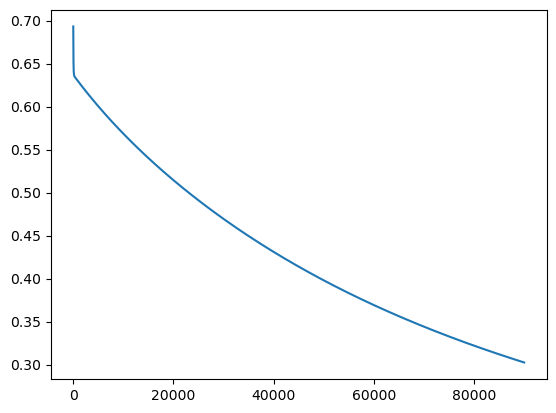

In [51]:
plt.plot(cost)

In [52]:
y_test = y_test.reshape((-1, 1))

In [53]:
y_test.shape

(178, 1)

In [54]:
def predict(X, theta):
    
    y_p = hypothesis(X, theta)
    
    y_pred = []

    for i in y_p:
        
        if i >= 0.5:
            y_pred.append(1)
            
        else:
            y_pred.append(0)
    y_pred = np.array(y_pred)        
    
    return y_pred

In [55]:
pred = predict(x_test, theta)

In [56]:
def accuracy(pred, label):
    
    temp = 0
    
    for i in range(pred.shape[0]):
        if pred[i]==label[i]:
            
            temp += 1
        else:
            pass
    print("Accuracy = ", (temp/pred.shape[0])*100, "%")

In [57]:
accuracy(pred, y_test)

Accuracy =  97.19101123595506 %


In [60]:
x_train

array([[ 0.,  3., 22., ...,  0.,  1.,  0.],
       [ 1.,  1., 38., ...,  0.,  0.,  1.],
       [ 1.,  3., 26., ...,  0.,  1.,  1.],
       ...,
       [ 1.,  1., 24., ...,  0.,  0.,  1.],
       [ 0.,  1., 28., ...,  0.,  1.,  0.],
       [ 1.,  1., 48., ...,  0.,  1.,  0.]])

In [61]:
predict([3,21.0,1,10.2500,0,0,1,0,1],theta) 

array([0])